Notebook for processing runs from openmm/particle simulator

Had trouble getting pytraj to build on local computers, so the first step is a laborious one of opening the notebook on colab, uploading the files, and doing the initial computation of rmsd values 

In [2]:
! pip install pytraj

     |████████████████████████████████| 16.1 MB 6.5 MB/s 


In [18]:
import pytraj as pt
import matplotlib.pyplot as plt
import numpy as np


In [36]:
from matplotlib import path
class empty:pass


# stores data
cases = dict()

pathRatios = [0.5,0.8,1]
#caseNames = ['test1','test2','test3']
iters = 5
base = "pathwidth"
equilFrame = 400

pathRatio = pathRatios[0]


slopes = []
for pathRatio in pathRatios:
  for iter in range(iters):

    caseName = base + "_%3.1f_%d"%(pathRatio,iter)
    print(caseName)
  
    # load
    traj = pt.iterload(caseName+".dcd", caseName+".pdb")

    # get rmsd 
    rmsdAll = pt.rmsd(traj, mask='@RC', ref=0)
    rmsd = rmsdAll[equilFrame:]
    tEnd = np.shape(rmsd)[0] 
    dt = 1.
    ts = np.arange(tEnd) * dt
    
    # fit for D 
    #slope,intercept= np.polyfit(ts, ts*iter, 1)
    slope,intercept= np.polyfit(ts, rmsd, 1)
    slopes.append(slope)
    #print(slope)
    #plt.plot(rmsd)
    #plt.plot(ts,ts*slope+intercept)
    # 

  # x**2 = 4*D*t
  #      = slope * t ==> D = slope/4.
  Ds =  np.asarray( slopes )/4.

  case = empty()
  case.Dmean = np.mean( Ds )
  case.Dstd = np.std( Ds)

  cases[pathRatio] = case



pathwidth_0.5_0
pathwidth_0.5_1
pathwidth_0.5_2
pathwidth_0.5_3
pathwidth_0.5_4
pathwidth_0.8_0
pathwidth_0.8_1
pathwidth_0.8_2
pathwidth_0.8_3
pathwidth_0.8_4
pathwidth_1.0_0
pathwidth_1.0_1
pathwidth_1.0_2
pathwidth_1.0_3
pathwidth_1.0_4


[0.00014317291602721283, 0.00016077295450262765, 0.00016991743651641322]


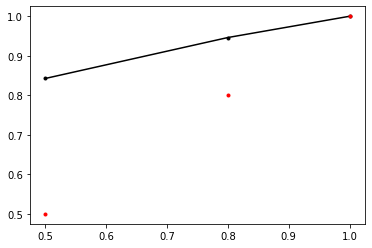

In [51]:

Ds = []
DsErr = []
inds = range( len( pathRatios ) )
for pathRatio in pathRatios:
  case = cases[pathRatio]
  Ds.append(case.Dmean)
  DsErr.append(case.Dstd)
  
# normalize by fastest Ds (widest)
nDs = np.array( Ds ) / Ds[-1]
nPRs = np.array( pathRatios ) / pathRatios[-1]

print(Ds)
#plt.bar(inds,Ds) 
#print(nDs)
plt.plot(nPRs,nDs,'k.',label="Sims")
plt.plot(nPRs,nDs,'k')
plt.plot(nPRs,nPRs,'r.',label="Analytic")

